# Essential Libraries for Medical Analysis
- Pandas
- Matplotlib
- Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("medical_records.csv")

- Display the first few rows of the dataset
- List the names of all columns in the DataFrame

In [2]:
print("First few rows: " )
print(data.head())
print("Column Names in the dataframe: ")
print(data.columns)

First few rows: 
   Patient_ID  Age  Gender  Height_cm  Weight_kg  Blood_Pressure_Systolic  \
0           1   10    Male        152      160.8                      131   
1           2  111  Female        172       31.1                      134   
2           3   97  Female        159       24.7                      147   
3           4  108  Female        146       61.3                      159   
4           5    8    Male        172      112.9                      132   

   Blood_Pressure_Diastolic Disease_Category  
0                        91          Healthy  
1                       100       Nephrology  
2                        87     Hypertension  
3                        99           Stroke  
4                        92          Healthy  
Column Names in the dataframe: 
Index(['Patient_ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Disease_Category'],
      dtype='object')


# Calculate and display various statistics about the data:


In [3]:
print("\nSummary Statistics: ")
print("\n",data.describe(include='all'))


Summary Statistics: 

          Patient_ID          Age Gender    Height_cm    Weight_kg  \
count   1000.000000  1000.000000   1000  1000.000000  1000.000000   
unique          NaN          NaN      2          NaN          NaN   
top             NaN          NaN   Male          NaN          NaN   
freq            NaN          NaN    508          NaN          NaN   
mean     500.500000    59.068000    NaN   161.067000    83.054200   
std      288.819436    33.144591    NaN     9.982392    46.915766   
min        1.000000     1.000000    NaN   145.000000     2.000000   
25%      250.750000    29.000000    NaN   152.000000    42.100000   
50%      500.500000    60.500000    NaN   161.000000    83.150000   
75%      750.250000    87.000000    NaN   170.000000   122.850000   
max     1000.000000   115.000000    NaN   178.000000   166.800000   

        Blood_Pressure_Systolic  Blood_Pressure_Diastolic Disease_Category  
count               1000.000000               1000.000000             

# Filter the data to include only patients diagnosed with Stroke:

- This focuses on a specific group within the data creating a new DataFrame named stroke_data.
- This new DataFrame only includes rows from the original data where the value in the ‘Disease_Category‘ column is ‘Stroke’.

- In simpler terms, it filters the data to keep only information about patients diagnosed with Stroke.

In [4]:
stroke_data = data[data['Disease_Category'] == 'Stroke']
print("Stroke data summary: ")
print(stroke_data.describe(include='all'))

Stroke data summary: 
        Patient_ID         Age Gender   Height_cm   Weight_kg  \
count   164.000000  164.000000    164  164.000000  164.000000   
unique         NaN         NaN      2         NaN         NaN   
top            NaN         NaN   Male         NaN         NaN   
freq           NaN         NaN     84         NaN         NaN   
mean    474.170732   57.097561    NaN  160.817073   84.425000   
std     289.189403   32.856487    NaN    9.818760   46.449049   
min       4.000000    2.000000    NaN  145.000000    4.900000   
25%     228.250000   26.750000    NaN  151.000000   45.050000   
50%     443.000000   57.500000    NaN  160.000000   84.250000   
75%     715.250000   86.000000    NaN  169.000000  130.200000   
max     993.000000  115.000000    NaN  178.000000  164.700000   

        Blood_Pressure_Systolic  Blood_Pressure_Diastolic Disease_Category  
count                164.000000                164.000000              164  
unique                      NaN            

# Grouping and Analyzing by Disease Category
- Organize by Disease: Imagine sorting patients by their disease type.
- Each Disease: It calculates average age, blood pressure spread, and other summaries for each disease group, This information is stored in a new table named disease_stats. See the Breakdown: It shows you the disease_stats table, which offers a quick overview of how different diseases affect various medical aspects.

In [5]:
disease_stats = data.groupby('Disease_Category').describe(include='all')
print("Statistics by Disease Category:")
print(disease_stats) 


Statistics by Disease Category:
                 Patient_ID                                               \
                      count unique top freq        mean         std  min   
Disease_Category                                                           
Cancer                131.0    NaN NaN  NaN  496.274809  287.514790  9.0   
Diabetes              140.0    NaN NaN  NaN  517.085714  286.847401  6.0   
Healthy               135.0    NaN NaN  NaN  527.970370  299.616146  1.0   
Heart Disease         153.0    NaN NaN  NaN  517.692810  291.075960  8.0   
Hypertension          137.0    NaN NaN  NaN  474.525547  272.902808  3.0   
Nephrology            140.0    NaN NaN  NaN  498.850000  294.888954  2.0   
Stroke                164.0    NaN NaN  NaN  474.170732  289.189403  4.0   

                                         ... Blood_Pressure_Diastolic      \
                     25%    50%     75%  ...                   unique top   
Disease_Category                         ...         

# Box Plot of Age by Disease
- X-axis Shows disease categories. Y-axis Shows age.The entire dataset is used to create the plot.
- Title: “Distribution of Age by Disease Category”

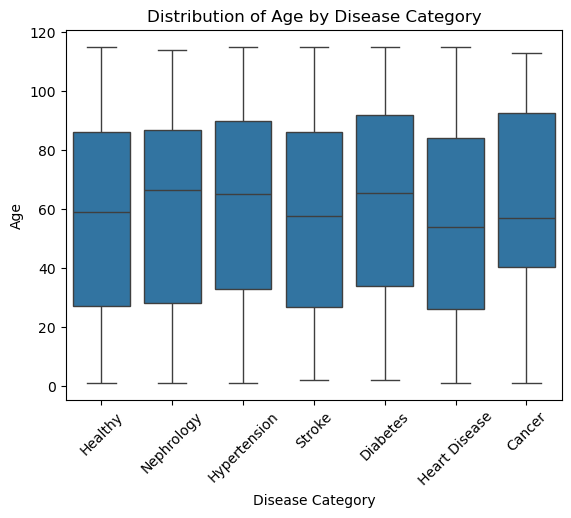

In [6]:
sns.boxplot(
    x = "Disease_Category" ,
    y = "Age" ,
    data=data
)
plt.title("Distribution of Age by Disease Category")
plt.xlabel("Disease Category")
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

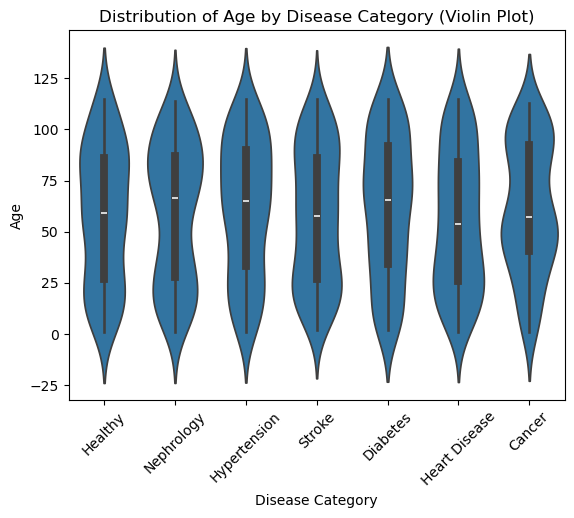

In [7]:
sns.violinplot(
    x = "Disease_Category",
    y = "Age",
    data=data
)
plt.title('Distribution of Age by Disease Category (Violin Plot)')
plt.xlabel('Disease Category')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

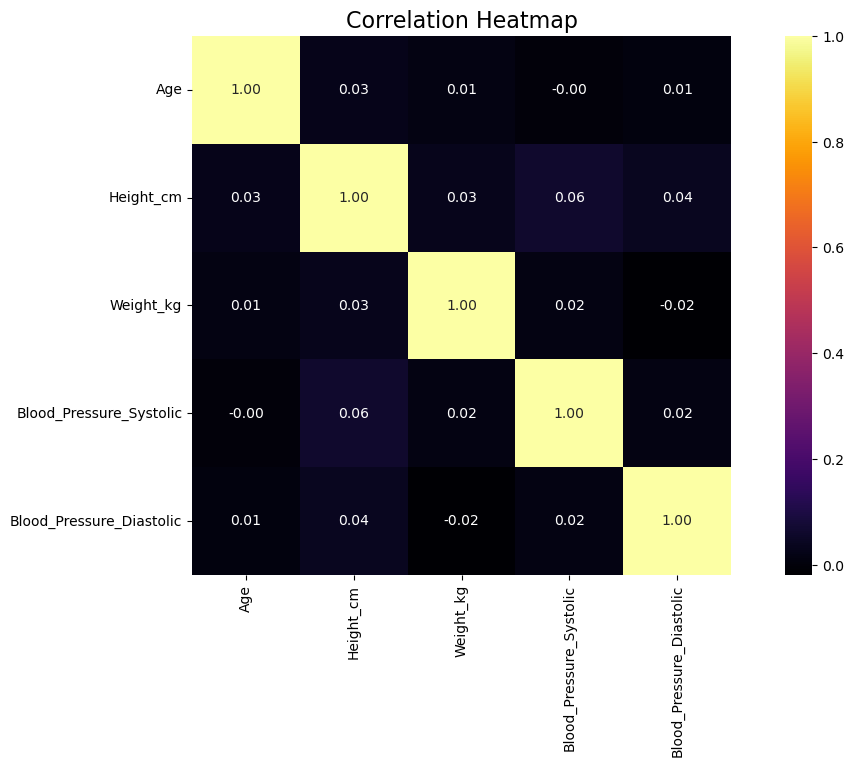

In [8]:
def plot_correlation_heatmap(data):
    """
    Plots a heatmap of the correlation matrix for the given data.
    
    Parameters:
    data (pd.DataFrame): The dataset for which to plot the correlation heatmap.
    
    Returns:
    None
    """

    numeric_data = data[['Age', 'Height_cm', 'Weight_kg', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic']]
    
    corr_matrix = numeric_data.corr()
    
    plt.figure(figsize=(14, 7))
    
    sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt='.2f', square=True)

    plt.title('Correlation Heatmap', fontsize=16)
  
    plt.show()

plot_correlation_heatmap(data)

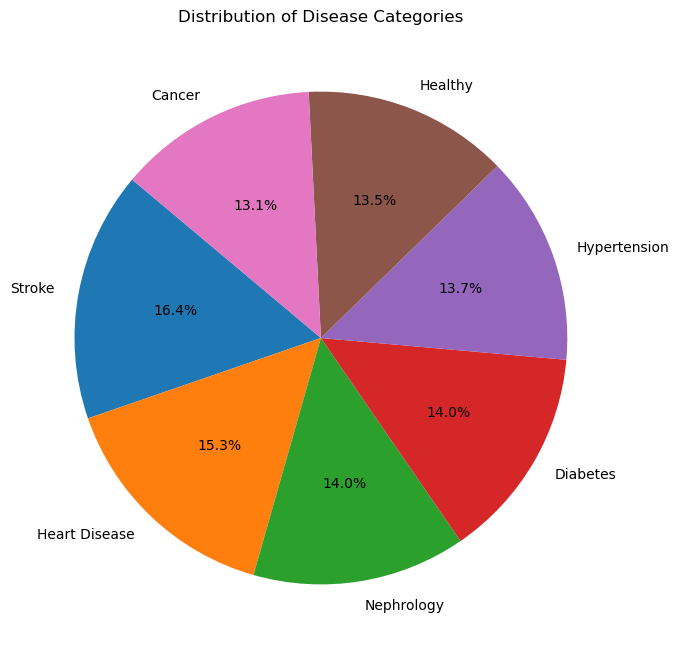

In [12]:
disease_category_column = 'Disease_Category'

# Count the occurrences of each category
disease_counts = data[disease_category_column].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Disease Categories')
plt.show()